### Data Wrangling MLB Project 
Allison Elmore 

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# import both csv files 

In [9]:
# Import csv file data source number 1
mlb_stats1 = pd.read_csv('mlb-player-stats-Batters.csv', sep = ',')
display(mlb_stats1)

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Aaron Judge,NYY,OF,32,158,559,122,180,36,1,...,0,133,171,0,2,9,0.322,0.458,0.701,1.159
1,Shohei Ohtani,LAD,DH,30,159,636,134,197,38,7,...,4,81,162,0,5,6,0.310,0.390,0.646,1.036
2,Anthony Santander,BAL,OF,30,155,595,91,140,25,2,...,0,58,129,0,5,7,0.235,0.308,0.506,0.814
3,Juan Soto,NYY,OF,26,157,576,128,166,31,4,...,4,129,119,0,4,4,0.288,0.419,0.569,0.988
4,Jose Ramirez,CLE,3B,32,158,620,114,173,39,2,...,7,54,82,0,6,1,0.279,0.335,0.537,0.872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,Jacob Amaya,HOU,SS,26,1,1,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0.000
721,Duke Ellis,NYY,OF,26,3,1,0,1,0,0,...,0,0,0,0,0,0,1.000,1.000,1.000,2.000
722,Chris Roller,MIL,OF,28,1,1,0,0,0,0,...,0,0,1,0,0,0,0.000,0.000,0.000,0.000
723,Eric Yang,CIN,C,26,1,1,0,0,0,0,...,0,0,1,0,0,0,0.000,0.000,0.000,0.000


In [10]:
# import csv file with scraped data 
espn_data = pd.read_csv('scraped_espn_data_dwproject.csv') 
display(espn_data)

,Player,Yrs,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
0,Jose Iglesias,12,85,270,39,91,16,1,4,26,12,39,6,2,0.337
1,Bobby Witt Jr.,3,161,636,125,211,45,11,32,109,57,106,31,12,0.332
2,Xavier Edwards,2,70,265,39,87,12,5,1,26,33,52,31,4,0.328
3,Vladimir Guerrero Jr.,6,159,616,98,199,44,1,30,103,72,96,2,2,0.323
4,Aaron Judge,9,158,559,122,180,36,1,58,144,133,171,10,0,0.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Eddie Rosario,10,91,297,33,52,12,0,10,35,16,77,9,1,0.175
347,Mitch Garver,8,114,367,37,63,17,0,15,51,53,133,0,0,0.172
348,Brandon Drury,10,97,325,28,55,7,0,4,15,27,81,1,0,0.169
349,Joey Gallo,10,76,223,24,36,9,0,10,27,32,102,3,1,0.161


### Join two data sets together 

In [12]:
# Display both datasets 

In [13]:
mlb_stats1.head()

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,CS,BB,SO,SH,SF,HBP,AVG,OBP,SLG,OPS
0,Aaron Judge,NYY,OF,32,158,559,122,180,36,1,...,0,133,171,0,2,9,0.322,0.458,0.701,1.159
1,Shohei Ohtani,LAD,DH,30,159,636,134,197,38,7,...,4,81,162,0,5,6,0.310,0.390,0.646,1.036
2,Anthony Santander,BAL,OF,30,155,595,91,140,25,2,...,0,58,129,0,5,7,0.235,0.308,0.506,0.814
3,Juan Soto,NYY,OF,26,157,576,128,166,31,4,...,4,129,119,0,4,4,0.288,0.419,0.569,0.988
4,Jose Ramirez,CLE,3B,32,158,620,114,173,39,2,...,7,54,82,0,6,1,0.279,0.335,0.537,0.872


In [14]:
espn_data.head() 

,Player,Yrs,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA
0,Jose Iglesias,12,85,270,39,91,16,1,4,26,12,39,6,2,0.337
1,Bobby Witt Jr.,3,161,636,125,211,45,11,32,109,57,106,31,12,0.332
2,Xavier Edwards,2,70,265,39,87,12,5,1,26,33,52,31,4,0.328
3,Vladimir Guerrero Jr.,6,159,616,98,199,44,1,30,103,72,96,2,2,0.323
4,Aaron Judge,9,158,559,122,180,36,1,58,144,133,171,10,0,0.322


In [15]:
# Remove leading/training spaces in Player so we can merge on that colum 
mlb_stats1['Player'] = mlb_stats1['Player'].str.strip() 
espn_data['Player'] = espn_data['Player'].str.strip()  

In [16]:
# Merge the two dataframes 
merged_df = pd.merge(mlb_stats1, espn_data, on='Player', how='inner')

In [17]:
# Display Merged Data 
display(merged_df)

,Player,Team,Pos,Age,G_x,AB_x,R_x,H_x,2B_x,3B_x,...,H_y,2B_y,3B_y,HR_y,RBI_y,BB_y,SO_y,SB_y,CS_y,BA
0,Aaron Judge,NYY,OF,32,158,559,122,180,36,1,...,180,36,1,58,144,133,171,10,0,0.322
1,Shohei Ohtani,LAD,DH,30,159,636,134,197,38,7,...,197,38,7,54,130,81,162,59,4,0.310
2,Anthony Santander,BAL,OF,30,155,595,91,140,25,2,...,140,25,2,44,102,58,129,2,0,0.235
3,Juan Soto,NYY,OF,26,157,576,128,166,31,4,...,166,31,4,41,109,129,119,7,4,0.288
4,Jose Ramirez,CLE,3B,32,158,620,114,173,39,2,...,173,39,2,39,118,54,82,41,7,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Nick Senzel,CWS,OF,29,10,30,0,3,1,0,...,46,11,0,7,18,28,61,1,3,0.195
380,Dominic Smith,CIN,1B,29,9,26,4,5,2,0,...,64,22,0,6,34,28,76,1,1,0.233
381,Victor Robles,WSH,OF,27,14,25,3,3,0,0,...,78,20,0,4,28,21,53,34,2,0.307
382,Amed Rosario,LAD,SS,28,5,11,1,3,1,0,...,93,18,3,3,32,9,73,13,5,0.280


In [18]:
# Look at all columns and remove the duplicate columns 
for col in merged_df.columns:
    print(col)

Player
Team
Pos
Age
G_x
AB_x
R_x
H_x
2B_x
3B_x
HR_x
RBI_x
SB_x
CS_x
BB_x
SO_x
SH
SF
HBP
AVG
OBP
SLG
OPS
Yrs
G_y
AB_y
R_y
H_y
2B_y
3B_y
HR_y
RBI_y
BB_y
SO_y
SB_y
CS_y
BA


In [19]:
# Remove the Columns with _y after them. These are duplicate columns in the dataframe 
merged_df = merged_df.drop(columns=[col for col in merged_df.columns if col.endswith('_y')])

In [20]:
display(merged_df)

,Player,Team,Pos,Age,G_x,AB_x,R_x,H_x,2B_x,3B_x,...,SO_x,SH,SF,HBP,AVG,OBP,SLG,OPS,Yrs,BA
0,Aaron Judge,NYY,OF,32,158,559,122,180,36,1,...,171,0,2,9,0.322,0.458,0.701,1.159,9,0.322
1,Shohei Ohtani,LAD,DH,30,159,636,134,197,38,7,...,162,0,5,6,0.310,0.390,0.646,1.036,7,0.310
2,Anthony Santander,BAL,OF,30,155,595,91,140,25,2,...,129,0,5,7,0.235,0.308,0.506,0.814,8,0.235
3,Juan Soto,NYY,OF,26,157,576,128,166,31,4,...,119,0,4,4,0.288,0.419,0.569,0.988,7,0.288
4,Jose Ramirez,CLE,3B,32,158,620,114,173,39,2,...,82,0,6,1,0.279,0.335,0.537,0.872,12,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Nick Senzel,CWS,OF,29,10,30,0,3,1,0,...,8,1,0,0,0.100,0.129,0.133,0.262,6,0.195
380,Dominic Smith,CIN,1B,29,9,26,4,5,2,0,...,11,0,0,0,0.192,0.276,0.269,0.545,8,0.233
381,Victor Robles,WSH,OF,27,14,25,3,3,0,0,...,9,1,1,1,0.120,0.281,0.120,0.401,8,0.307
382,Amed Rosario,LAD,SS,28,5,11,1,3,1,0,...,2,0,0,0,0.273,0.333,0.364,0.697,8,0.280


In [21]:
# Rename columns by removing '_x' from the column names to clean the dataframe 
merged_df.rename(columns={col: col.replace('_x', '') for col in merged_df.columns if col.endswith('_x')}, inplace=True)

In [22]:
# Display new dataframe 
display(merged_df)

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,Yrs,BA
0,Aaron Judge,NYY,OF,32,158,559,122,180,36,1,...,171,0,2,9,0.322,0.458,0.701,1.159,9,0.322
1,Shohei Ohtani,LAD,DH,30,159,636,134,197,38,7,...,162,0,5,6,0.310,0.390,0.646,1.036,7,0.310
2,Anthony Santander,BAL,OF,30,155,595,91,140,25,2,...,129,0,5,7,0.235,0.308,0.506,0.814,8,0.235
3,Juan Soto,NYY,OF,26,157,576,128,166,31,4,...,119,0,4,4,0.288,0.419,0.569,0.988,7,0.288
4,Jose Ramirez,CLE,3B,32,158,620,114,173,39,2,...,82,0,6,1,0.279,0.335,0.537,0.872,12,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Nick Senzel,CWS,OF,29,10,30,0,3,1,0,...,8,1,0,0,0.100,0.129,0.133,0.262,6,0.195
380,Dominic Smith,CIN,1B,29,9,26,4,5,2,0,...,11,0,0,0,0.192,0.276,0.269,0.545,8,0.233
381,Victor Robles,WSH,OF,27,14,25,3,3,0,0,...,9,1,1,1,0.120,0.281,0.120,0.401,8,0.307
382,Amed Rosario,LAD,SS,28,5,11,1,3,1,0,...,2,0,0,0,0.273,0.333,0.364,0.697,8,0.280


In [23]:
# Create a csv for merged data 
merged_df.to_csv('MLB_merged_data.csv', index=False)

<br>

### 1.	How does player experience (years in MLB) affect batting average and home run production?

In [27]:
# read in csv 
MLB_merged_data= pd.read_csv('MLB_merged_data.csv') 
display(MLB_merged_data)

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,SO,SH,SF,HBP,AVG,OBP,SLG,OPS,Yrs,BA
0,Aaron Judge,NYY,OF,32,158,559,122,180,36,1,...,171,0,2,9,0.322,0.458,0.701,1.159,9,0.322
1,Shohei Ohtani,LAD,DH,30,159,636,134,197,38,7,...,162,0,5,6,0.310,0.390,0.646,1.036,7,0.310
2,Anthony Santander,BAL,OF,30,155,595,91,140,25,2,...,129,0,5,7,0.235,0.308,0.506,0.814,8,0.235
3,Juan Soto,NYY,OF,26,157,576,128,166,31,4,...,119,0,4,4,0.288,0.419,0.569,0.988,7,0.288
4,Jose Ramirez,CLE,3B,32,158,620,114,173,39,2,...,82,0,6,1,0.279,0.335,0.537,0.872,12,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Nick Senzel,CWS,OF,29,10,30,0,3,1,0,...,8,1,0,0,0.100,0.129,0.133,0.262,6,0.195
380,Dominic Smith,CIN,1B,29,9,26,4,5,2,0,...,11,0,0,0,0.192,0.276,0.269,0.545,8,0.233
381,Victor Robles,WSH,OF,27,14,25,3,3,0,0,...,9,1,1,1,0.120,0.281,0.120,0.401,8,0.307
382,Amed Rosario,LAD,SS,28,5,11,1,3,1,0,...,2,0,0,0,0.273,0.333,0.364,0.697,8,0.280


In [28]:
# Remove Players who have missing data for Years, Batting Average and Home Runs 
MLB_merged_data.dropna(subset=['Yrs', 'BA', 'HR'], inplace=True)

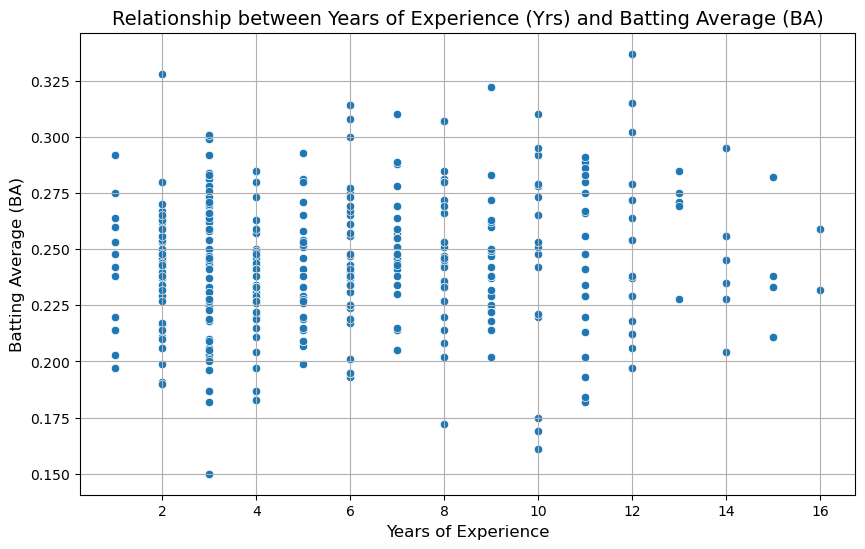

In [84]:
# Scatter plot for Years of Experience (Yrs) vs Batting Average (BA)
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Yrs', y='BA', data=MLB_merged_data)

# Add a title and labels
plt.title('Relationship between Years of Experience (Yrs) and Batting Average (BA)', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Batting Average (BA)', fontsize=12)

# Display a grid 
plt.grid(True)

# Show the plot
plt.show()

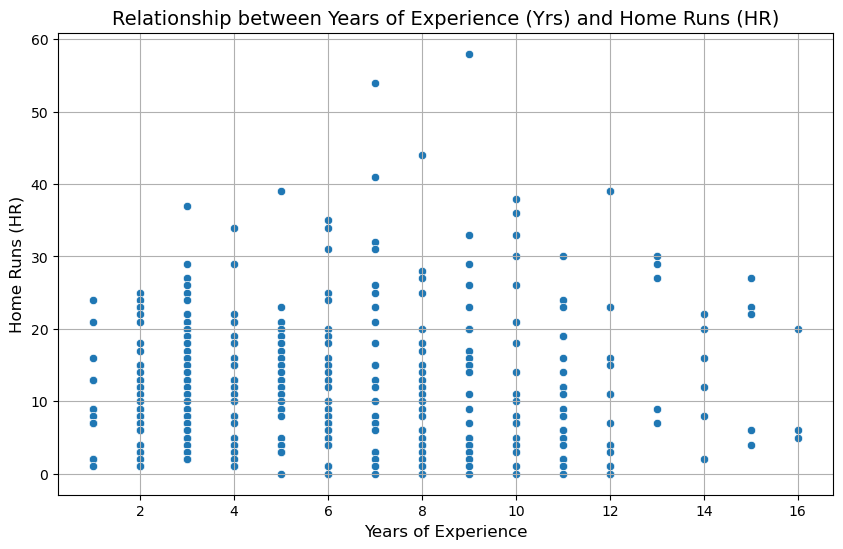

In [82]:
# Scatter plot for Years of Experience (Yrs) vs Home Runs (HR)
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Yrs', y='HR', data=MLB_merged_data)

# Add a title and labels
plt.title('Relationship between Years of Experience (Yrs) and Home Runs (HR)', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Home Runs (HR)', fontsize=12)

# Display a grid 
plt.grid(True)

# Show the plot
plt.show()

<br>

### 2.	How do player performance metrics vary by position? 

In [72]:
# Group by Position and calculate the mean for selected metrics
position_stats = MLB_merged_data.groupby('Pos').agg({
    'BA': 'mean', 
    'HR': 'mean', 
    'SLG': 'mean', 
    'OBP': 'mean',
    'OPS': 'mean',
    'R': 'mean',
    'H': 'mean'
}).reset_index()

# Display the stats for each position
print(position_stats)

  Pos        BA         HR       SLG       OBP       OPS          R          H
0  1B  0.245906  15.187500  0.407406  0.323875  0.731281  50.000000  98.718750
1  2B  0.241587   9.956522  0.372783  0.307109  0.679891  48.347826  93.413043
2  3B  0.243205  13.666667  0.399385  0.311641  0.711026  49.410256  95.307692
3   C  0.239714  11.877551  0.392980  0.307000  0.699980  40.040816  80.265306
4  DH  0.258700  15.800000  0.416600  0.316600  0.733200  47.600000  88.900000
5  OF  0.241210  12.475309  0.395630  0.309784  0.705414  47.253086  84.185185
6  SS  0.251239  11.413043  0.381522  0.302717  0.684239  51.478261  95.847826


/var/folders/92/dql_mmd94fv0nyjy8n6sgh100000gn/T/ipykernel_68753/2235893536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pos', y='BA', data=position_stats, palette='viridis')


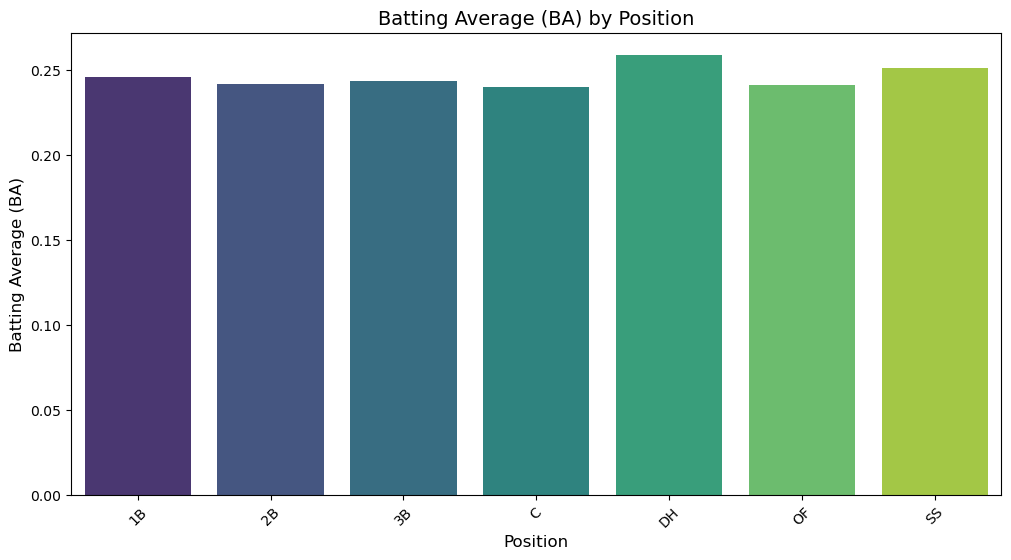

In [74]:
# Bar plot of batting average by position
plt.figure(figsize=(12, 6))
sns.barplot(x='Pos', y='BA', data=position_stats, palette='viridis')
plt.title('Batting Average (BA) by Position', fontsize=14)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Batting Average (BA)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/var/folders/92/dql_mmd94fv0nyjy8n6sgh100000gn/T/ipykernel_68753/1154718777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pos', y='HR', data=position_stats, palette='coolwarm')


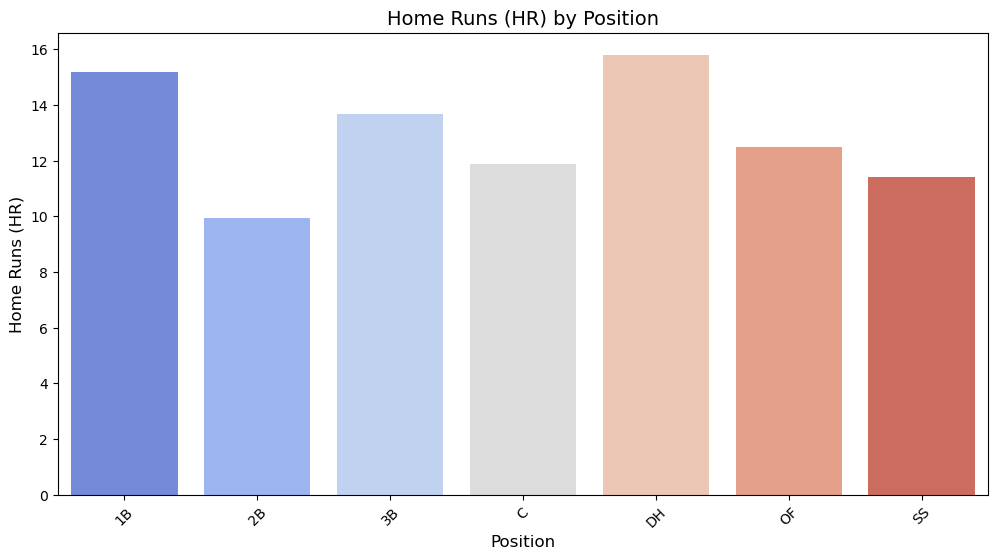

In [76]:
# Bar plot of Home Runs by Position 
plt.figure(figsize=(12, 6))
sns.barplot(x='Pos', y='HR', data=position_stats, palette='coolwarm')
plt.title('Home Runs (HR) by Position', fontsize=14)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Home Runs (HR)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<br>

### 3.	What is the effect of playing time on players batting average and on base percentage 

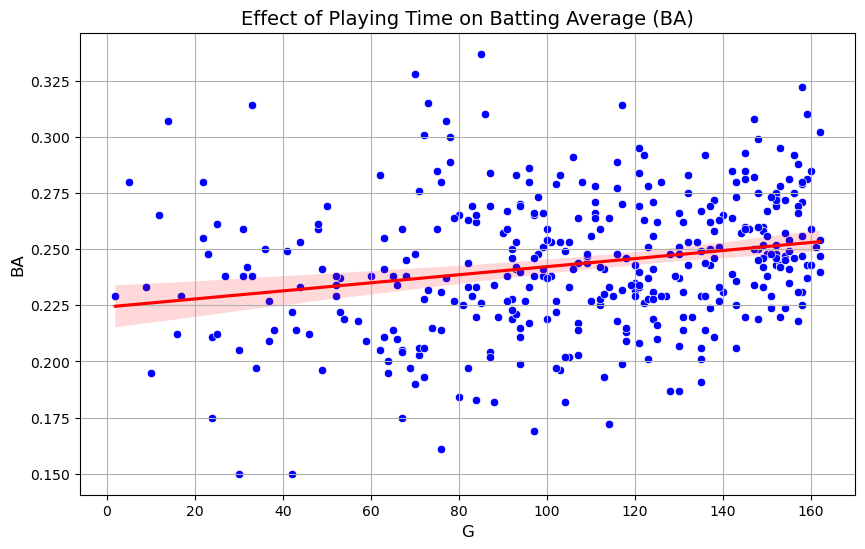

In [98]:
# Scatter plot for Years of Experience (Yrs) vs Batting Average (BA) 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='G', y='BA', data=MLB_merged_data, color='blue')

# Add a title and labels
plt.title('Effect of Playing Time on Batting Average (BA)', fontsize=14)
plt.xlabel('Number of Games Played (G)', fontsize=12)
plt.ylabel('Batting Average (BA)', fontsize=12)

# Add tredline 
sns.regplot(x='G', y='BA', data=MLB_merged_data, scatter=False, color='blue', line_kws={'color': 'red'})

# Display plot
plt.grid(True)
plt.show()


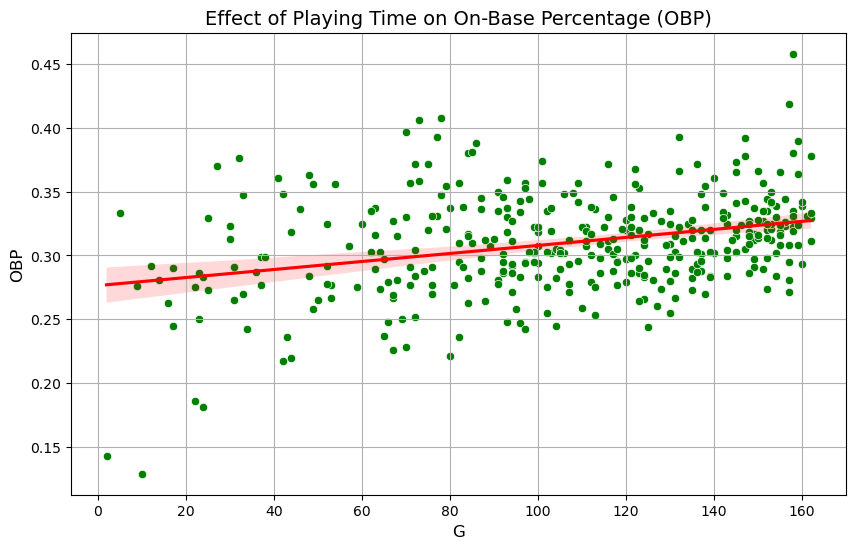

In [100]:
# Scatter plot for Years of Experience (Yrs) vs On-Base Percentage (OBP)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='G', y='OBP', data=MLB_merged_data, color='green')

# Add a title and labels
plt.title('Effect of Playing Time on On-Base Percentage (OBP)', fontsize=14)
plt.xlabel('Number of Games Played (G)', fontsize=12)
plt.ylabel('On-Base Percentage (OBP)', fontsize=12)

# Add tredline 
sns.regplot(x='G', y='OBP', data=MLB_merged_data, scatter=False, color='green', line_kws={'color': 'red'})

# Display grid and plot
plt.grid(True)
plt.show() 